In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score

### Make two blobs in two dimensional space
- Increasing cluster_std will make blobs larger and more overlapped

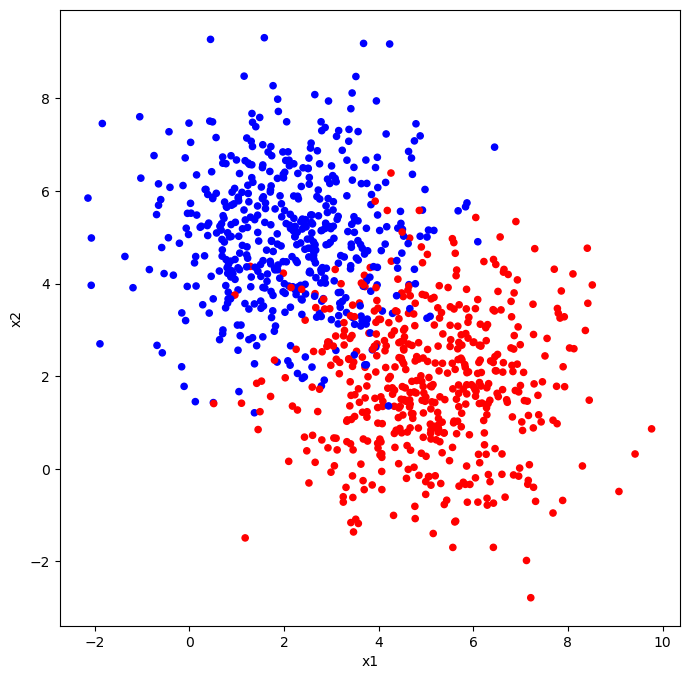

In [4]:
X, Y = make_blobs(n_samples= 1000, 
                  centers = [(5, 2), (2, 5)], 
                  cluster_std= 1.5)

df_blobs = pd.DataFrame(np.c_[X, Y], columns= ['x1', 'x2', 'target'])

df_blobs.plot.scatter(x= 'x1', y= 'x2', 
                c= df_blobs['target'].map({0:'red',1:'blue'}), 
                figsize= (8, 8))
plt.show()

In [5]:
X_train, X_test, y_train, y_test = \
train_test_split(df_blobs[['x1', 'x2']], df_blobs['target'],
                 test_size= 0.2, 
                 stratify= df_blobs['target']
                )

print(f'Training Data Instances: {X_train.shape[0]}')
print(f'Testing Data Instances: {X_test.shape[0]}')

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)

Training Data Instances: 800
Testing Data Instances: 200


### Show training data

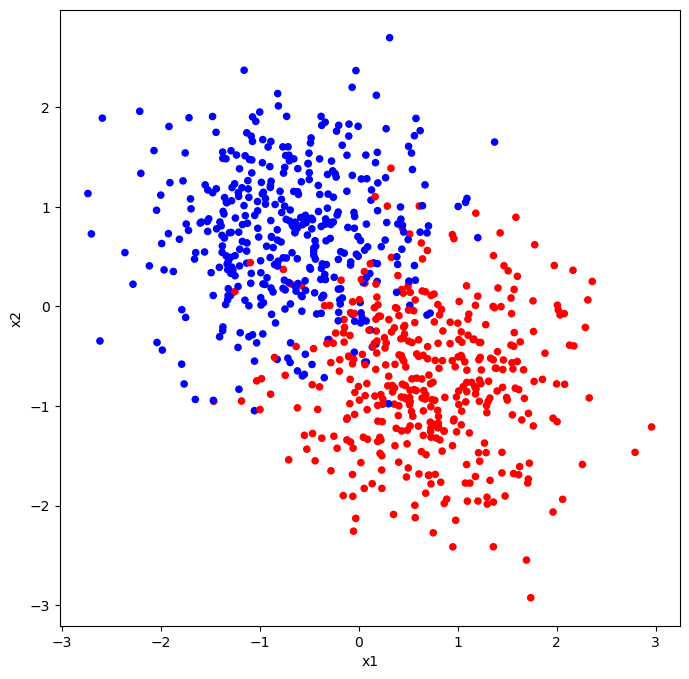

In [6]:
X_train.plot.scatter(x= 'x1', y= 'x2', 
                     c= y_train.map({0:'red', 1:'blue'}), 
                     figsize= (8, 8))
plt.show()

/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


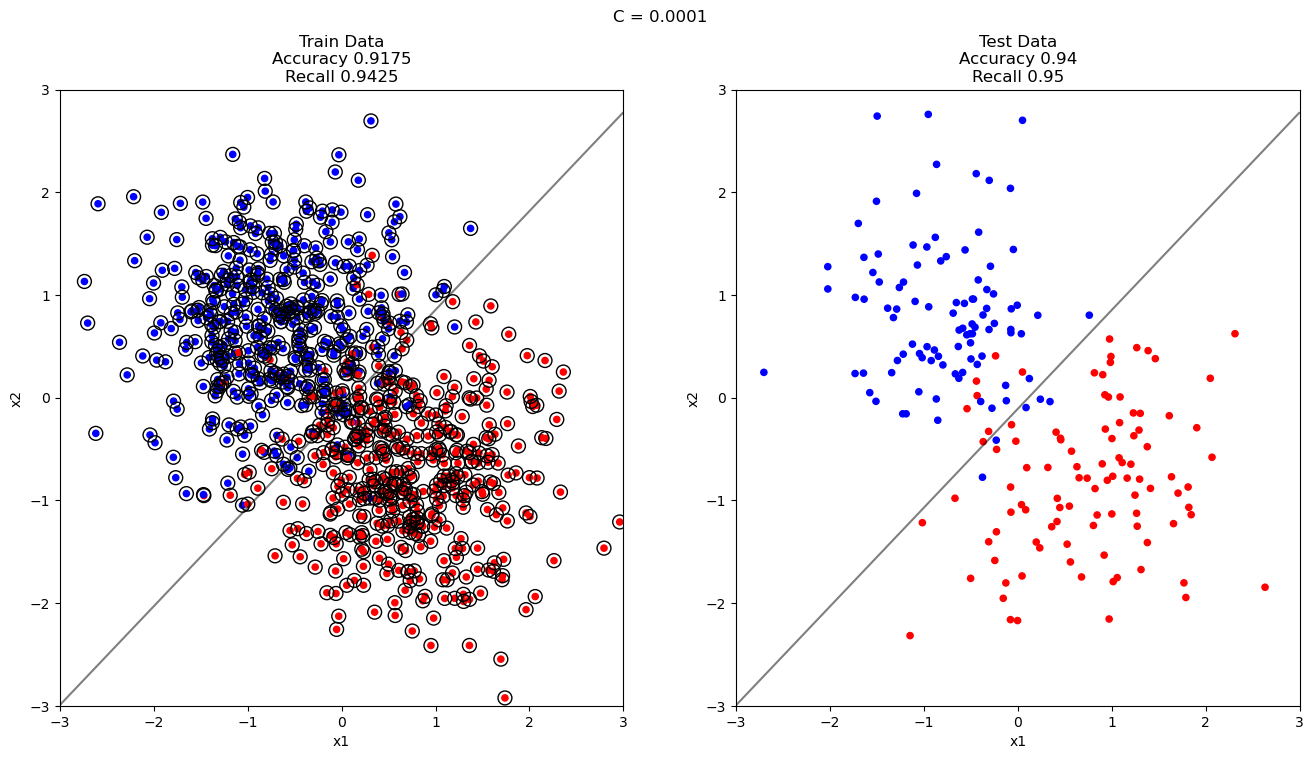

/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


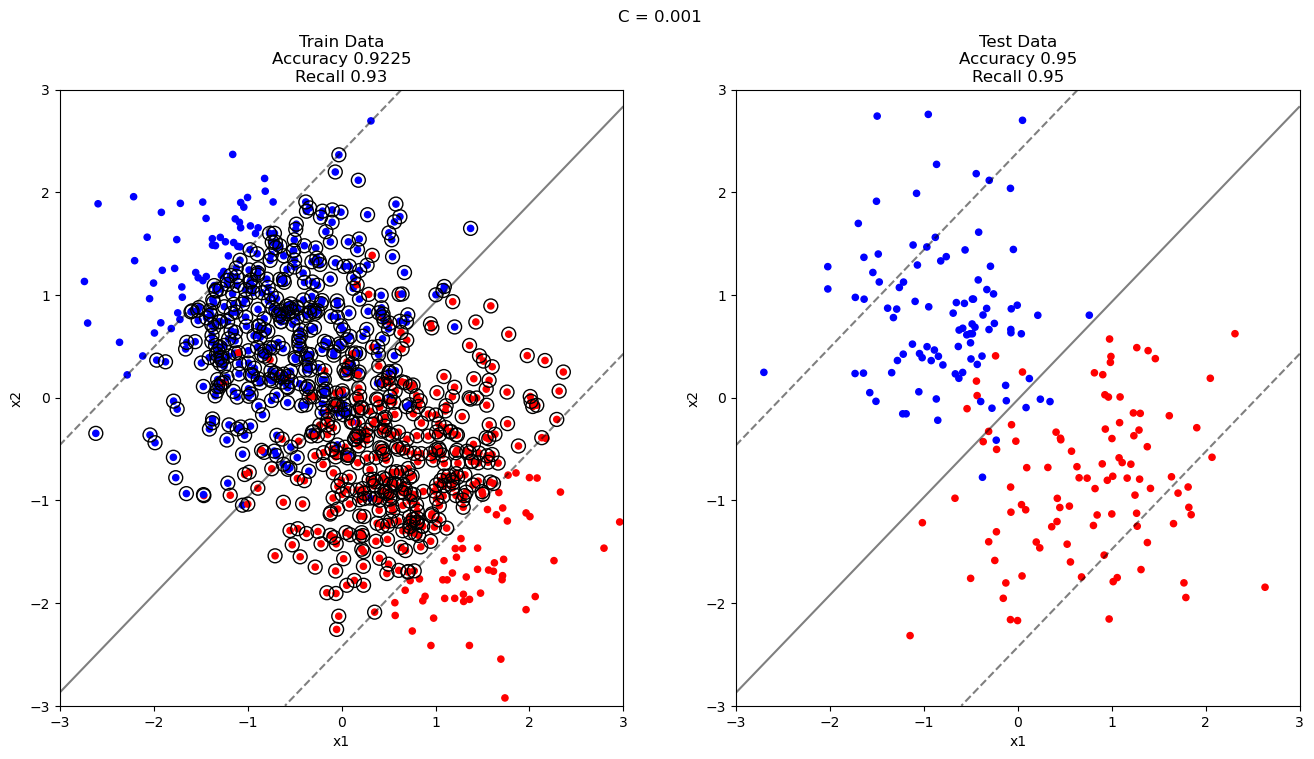

/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


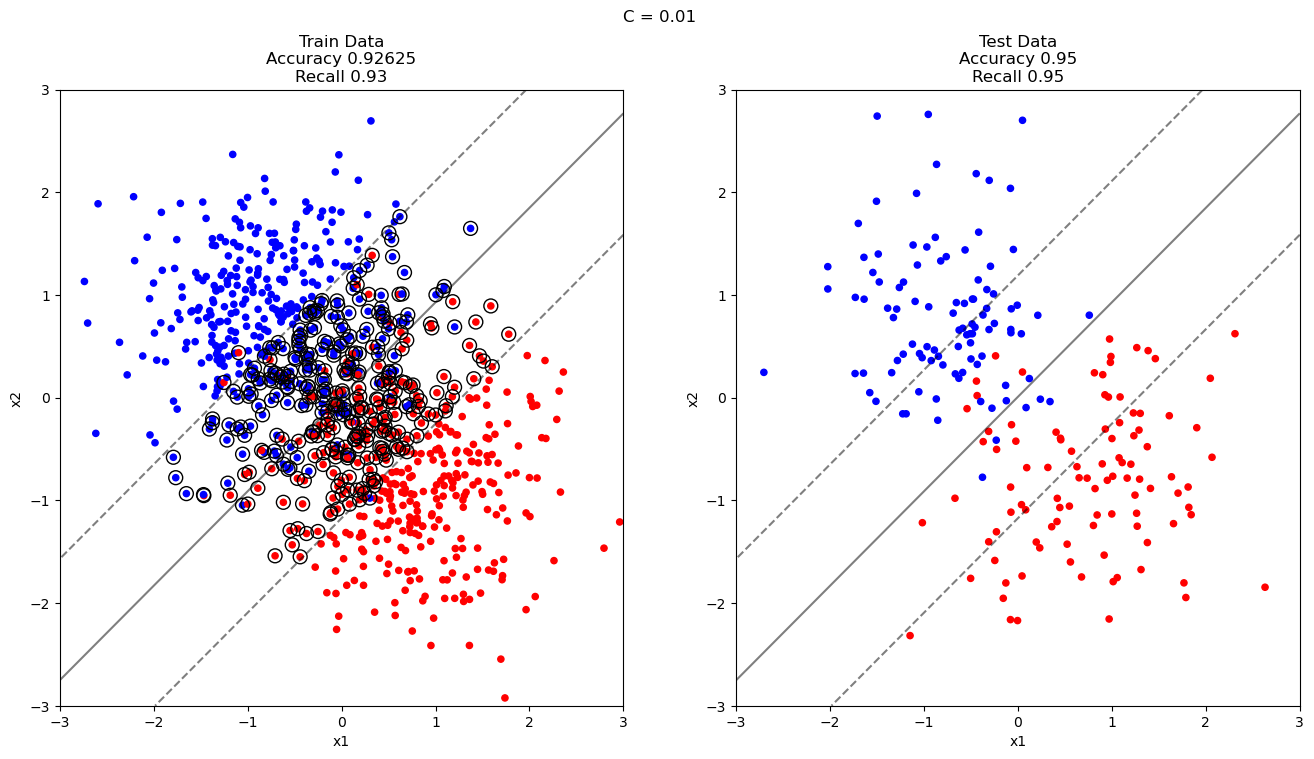

/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


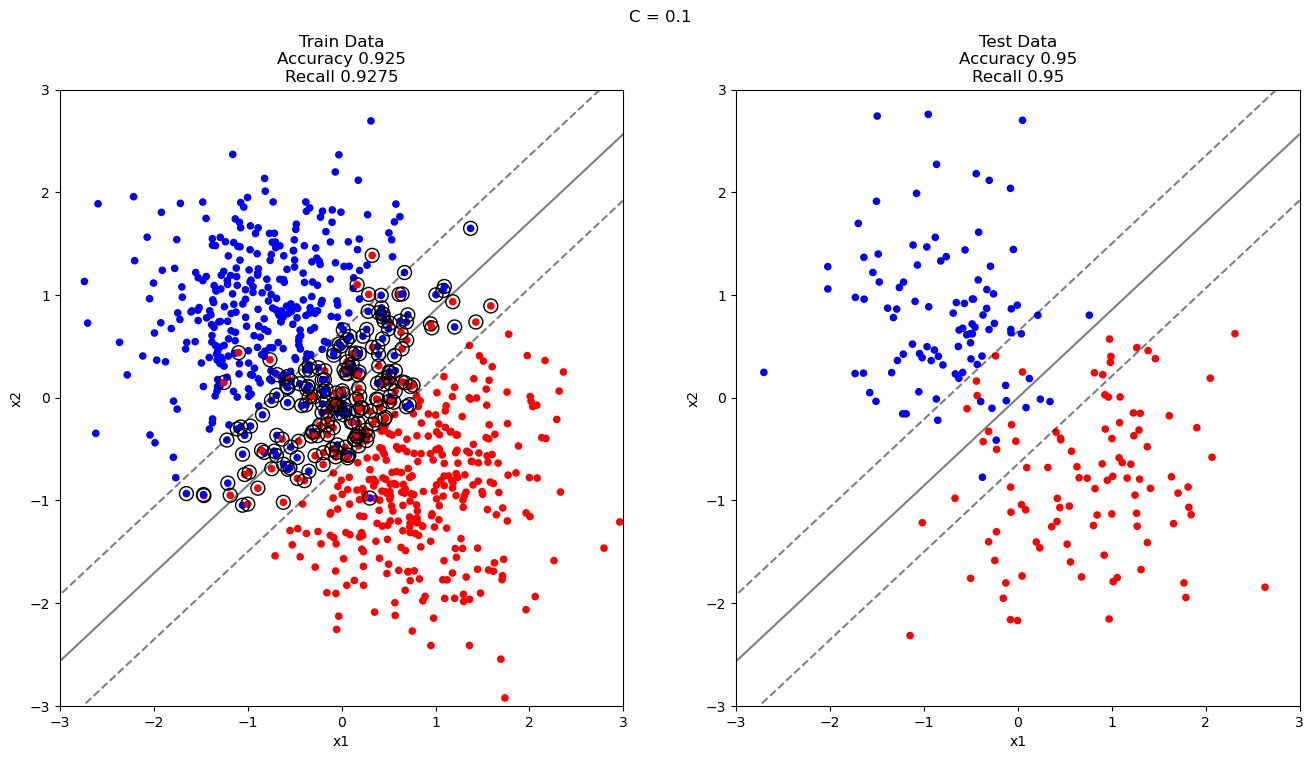

/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


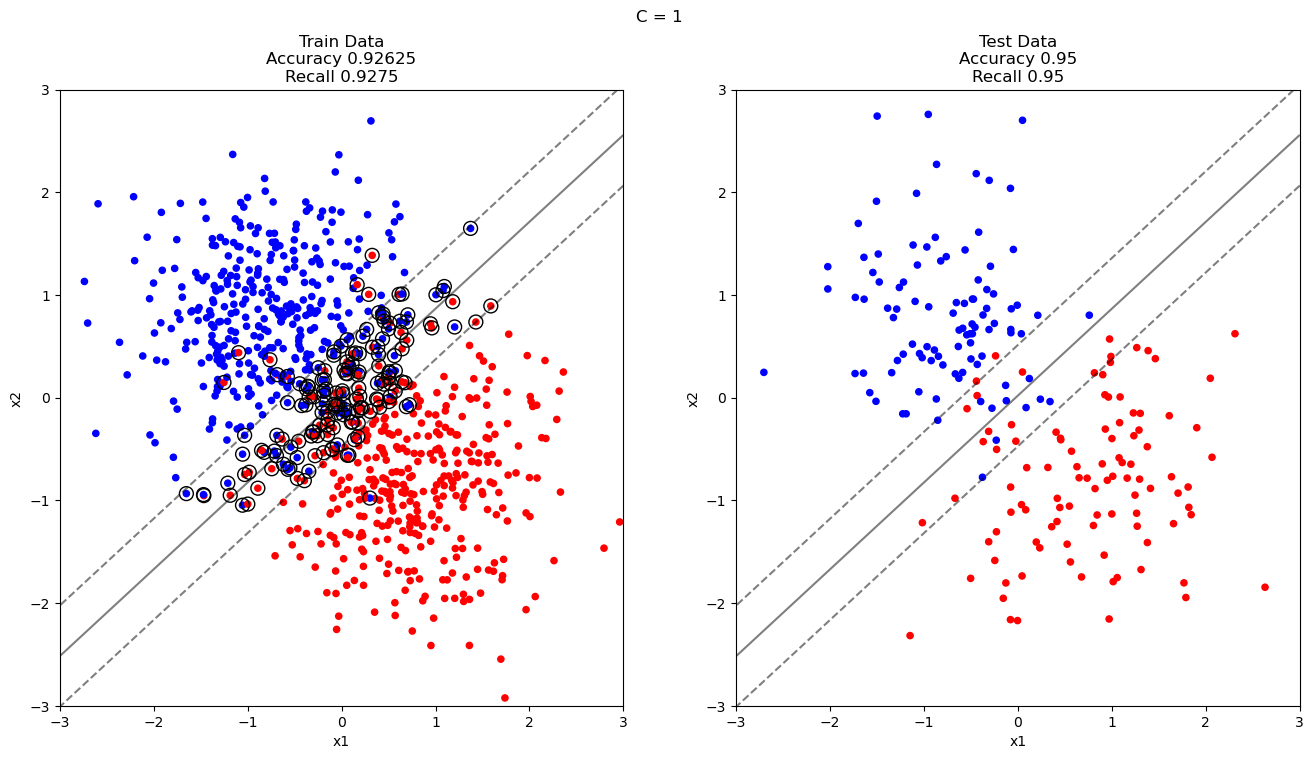

/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


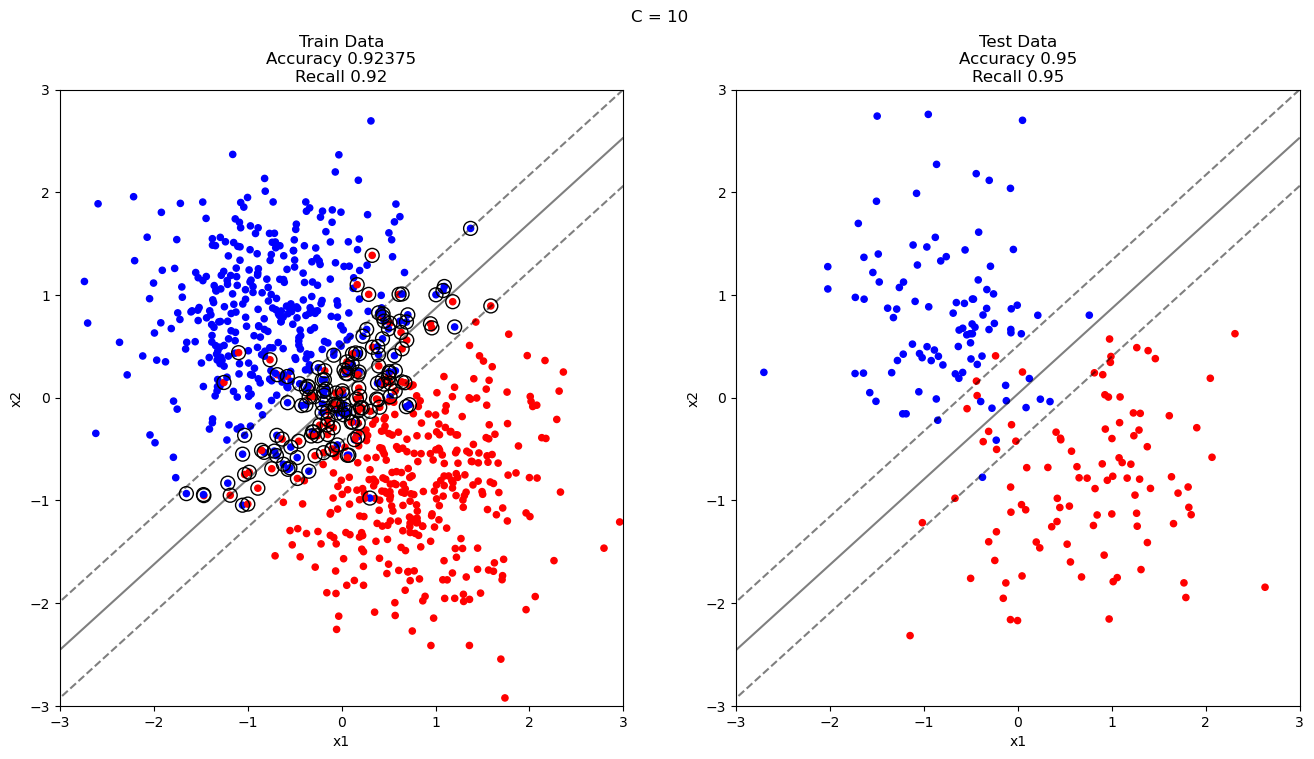

/Users/lucassawle/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


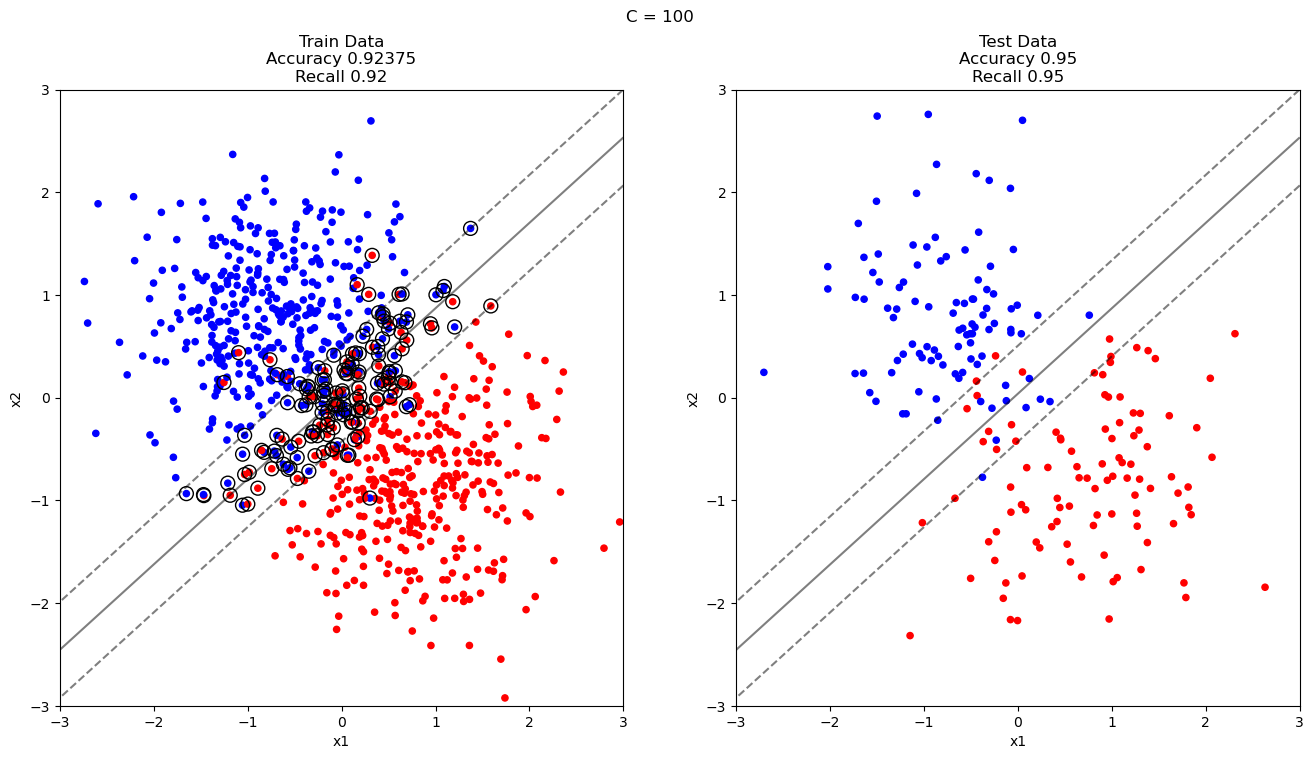

In [7]:
for c in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
    svm_lin = svm.SVC(kernel='linear', C= c)
    svm_lin.fit(X_train, y_train)

    xx = np.linspace(np.floor(X_train.x1.min()),
                     np.ceil(X_train.x1.max()))
    yy = np.linspace(np.floor(X_train.x2.min()),
                     np.ceil(X_train.x2.max()))

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm_lin.decision_function(xy).reshape(XX.shape)

    fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize= (16, 8))
    X_train.plot.scatter(x= 'x1', y= 'x2', 
                         c= y_train.map({0:'red', 1:'blue'}),
                         ax= ax1)
    ax1.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax1.scatter(svm_lin.support_vectors_[:, 0], svm_lin.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none', edgecolors='k')
    ax1.set_title(f'Train Data\nAccuracy {accuracy_score(y_true= y_train, y_pred= svm_lin.predict(X_train))}\nRecall {np.round(recall_score(y_true= y_train, y_pred= svm_lin.predict(X_train)), 10)}')

    X_test.plot.scatter(x= 'x1', y= 'x2', 
                         c= y_test.map({0:'red', 1:'blue'}),
                         ax= ax2)
    ax2.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax2.set_title(f'Test Data\nAccuracy {accuracy_score(y_true= y_test, y_pred= svm_lin.predict(X_test))}\nRecall {np.round(recall_score(y_true= y_test, y_pred= svm_lin.predict(X_test)), 10)}')
    fig.suptitle(f'C = {c}')
    plt.show()